In [4]:
# import fiona
# import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pprint
import pandas as pd
import datetime as dt

In [2]:
sites = ['420 34th Street N.E.,Washington, DC 20019',
         '517 N SAINT ASAPH ST, ALEXANDRIA HEALTH',
         '600 Dorsey Avenue',
         '          6100 ARLINGTON BLVD MONTG WARD',
         '6507 COLUMBIA PIKE',
         'CUB RUN LEE RD CHANT.(CUBRUN TREAT PLANT',
         'Howard University\'s Beltsville Laboratory, 12003 Old Baltimore Pike',
         'LEWINSVILLE 1437 BALLS HILL RD']
class Molecule:
    
    '''sites: '420 34th Street N.E.,Washington, DC 20019',
         '517 N SAINT ASAPH ST, ALEXANDRIA HEALTH',
         '600 Dorsey Avenue',
         '          6100 ARLINGTON BLVD MONTG WARD',
         '6507 COLUMBIA PIKE',
         'CUB RUN LEE RD CHANT.(CUBRUN TREAT PLANT',
         'Howard University\'s Beltsville Laboratory, 12003 Old Baltimore Pike',
         'LEWINSVILLE 1437 BALLS HILL RD'.
         '''
    
    def __init__(self, file, site):
        self.file = file
        self.site = site
        
    def molecule(self, mol, col):
        '''mols: NO2, O3, SO2, CO.
        cols: mean, max.'''
        df = pd.read_csv(self.file)
        df = df[df['Address'] == self.site]
        if col == 'mean':
            molreturn = df[mol + ' Full Mean']/df[mol + ' Units Numeric']
        if col == 'max':
            molreturn = df[mol + ' Full 1st Max Value']/df[mol + ' Units Numeric']        
        self.molreturn = molreturn
        return (molreturn)
    
    def healthy(self, mol):
        df = pd.read_csv(self.file)
        df = df[df['Address'] == self.site]
        
        if mol == 'NO2':
            level = 53
        if mol == 'O3':
            level = .07
        if mol == 'SO2':
            level = 75
        if mol == 'CO':
            level = 9
        
        bound = [level] * len(df[mol + ' Units Numeric'])
        
        return (bound)

In [5]:
def createfigure(mol, mol1, mol2, bound):
    
    nday = len(mol1)
    
    datespace = dt.datetime(2010, 12, 31)
    date = [datespace - dt.timedelta(days=x) for x in range(0, nday)]

    fig=plt.figure(figsize=[15, 15])
    ax1=plt.subplot2grid((10,1),(0,0),rowspan=2)
    ax2=plt.subplot2grid((10,1),(3,0),rowspan=2)

    ax1.plot(date, mol1, c='b')
    ax2.plot(date, mol2,c='g')
    
    ax1.plot(date, bound)
    ax2.plot(date, bound)

    ax1.set_title(mol + ' Daily Mean')
    ax2.set_title(mol + ' Daily First Max')
    
    if mol == 'CO':
        unit = 'ppm'
    if mol == 'O3':
        unit = 'ppm'
    if mol == 'NO2':
        unit = 'ppb'
    if mol == 'SO2':
        unit = 'ppb'

    ax1.set_ylabel(mol + ' ' + unit)
    ax2.set_ylabel(mol + ' ' + unit)

    ax1.set_facecolor('floralwhite')
    ax2.set_facecolor('floralwhite')

    fig.suptitle('2000-2010 ' + mol + ' Concentrations', y = .92, fontsize = 25)
    fig.patch.set_facecolor('.8')
    
    plt.show()

C:\Users\lostk\Anaconda3\envs\geo_env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


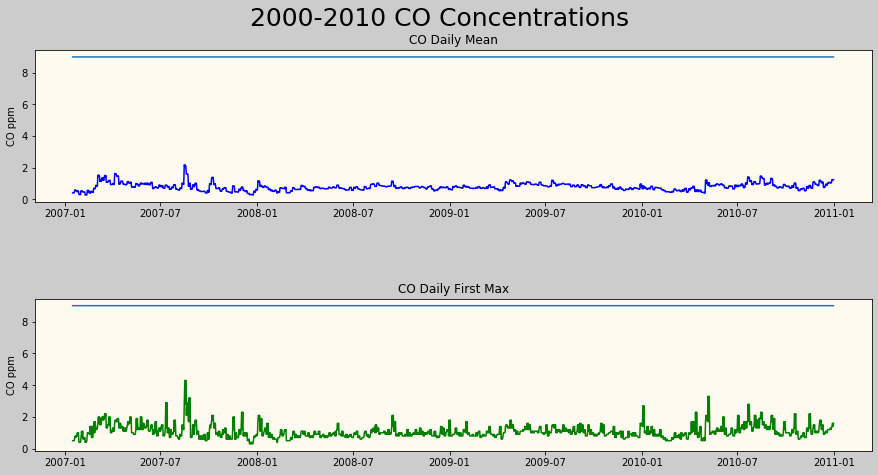

In [6]:
# Write the molecule you want
mol = 'CO'

# Change the path of the CSV first
# Write the site number (sites in __doc__ or shown above) at the end if using full data set
Mol = Molecule(r'Data_Level5_BAH_NewPollution.csv', sites[3])

# Write the desired outcomes (usually will be mean and max)
mol1 = Mol.molecule(mol, 'mean')
mol2 = Mol.molecule(mol, 'max')

# Used for getting the pollutant line on the graph or just calling it
bound = Mol.healthy(mol)

# Create the figure using the molecule, mean, max, and horizontal healthy line
createfigure(mol, mol1, mol2, bound)

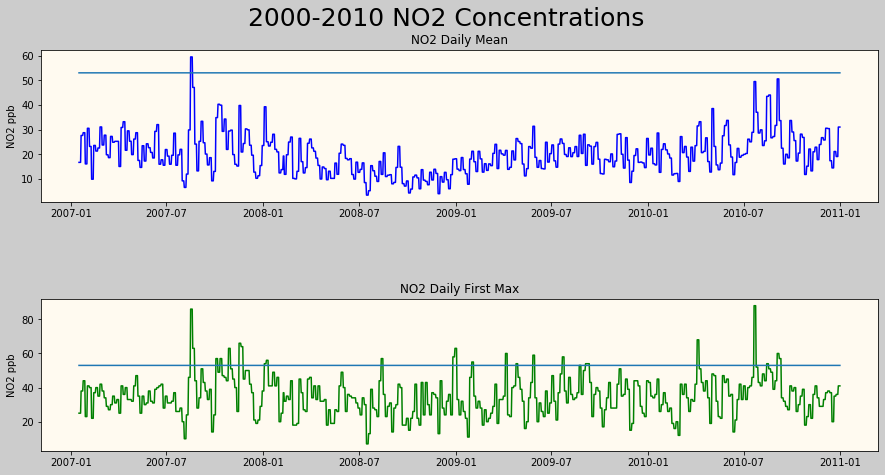

In [7]:
Mol = Molecule(r'Data_Level5_BAH_NewPollution.csv', sites[3])
mol = 'NO2'
mol1 = Mol.molecule(mol, 'mean')
mol2 = Mol.molecule(mol, 'max')
bound = Mol.healthy(mol)
createfigure(mol, mol1, mol2, bound)

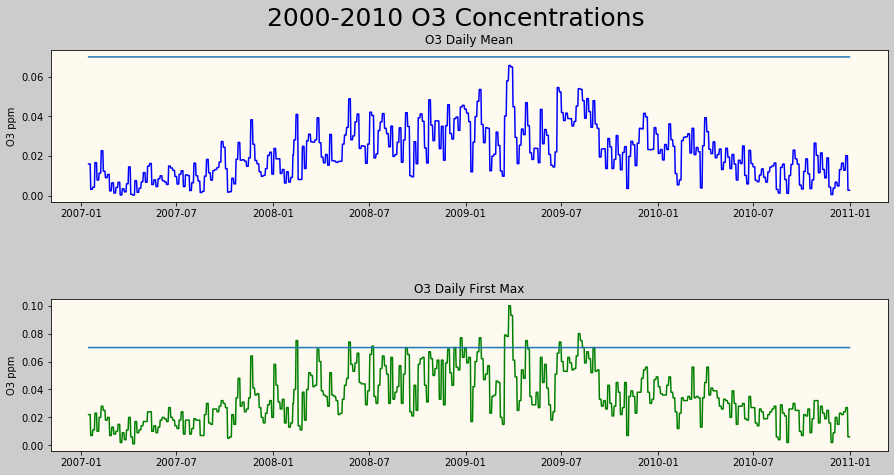

In [11]:
mol = 'O3'
Mol = Molecule(r'Data_Level5_BAH_NewPollution.csv', sites[3])
mol1 = Mol.molecule(mol, 'mean')
mol2 = Mol.molecule(mol, 'max')
bound = Mol.healthy(mol)
createfigure(mol, mol1, mol2, bound)

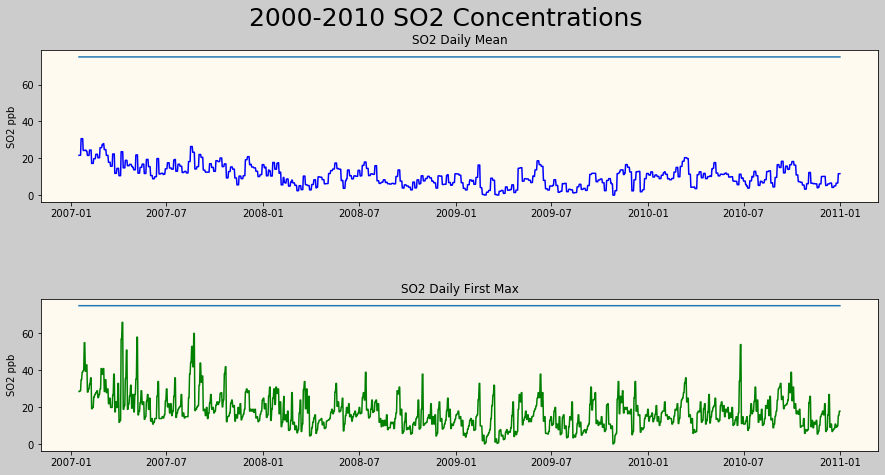

In [10]:
mol = 'SO2'
Mol = Molecule(r'Data_Level5_BAH_NewPollution.csv', sites[3])
mol1 = Mol.molecule(mol, 'mean')
mol2 = Mol.molecule(mol, 'max')
bound = Mol.healthy(mol)
createfigure(mol, mol1, mol2, bound)